# Chapter 3: Classification - Notebook Reproduksi Kode

Bab ini fokus pada tugas klasifikasi, menggunakan dataset MNIST (citra digit tulisan tangan).
Ini mencakup berbagai metrik kinerja classifier, binary dan multiclass classification,
serta analisis kesalahan.

Mengunduh dataset MNIST...
Dataset MNIST berhasil diunduh.
Bentuk data X: (70000, 784)
Bentuk data y: (70000,)
Ukuran set pelatihan X_train: (60000, 784)
Ukuran set pengujian X_test: (10000, 784)


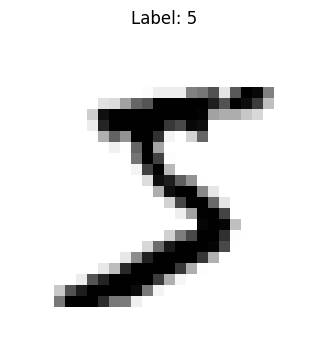


--- Melatih SGDClassifier sebagai detektor '5': ---
SGDClassifier berhasil dilatih.
Prediksi untuk digit pertama (yang seharusnya '5'): [ True]

--- Akurasi SGDClassifier (Cross-Validation): ---
Scores akurasi: [0.95035 0.96035 0.9604 ]
Rata-rata akurasi: 0.9570
Scores akurasi (Never5Classifier): [0.91125 0.90855 0.90915]
Rata-rata akurasi (Never5Classifier): 0.9096
Catatan: Akurasi bukan metrik terbaik untuk dataset yang miring (skewed).

--- Confusion Matrix SGDClassifier: ---
[[53892   687]
 [ 1891  3530]]
Baris: kelas aktual (True Neg, True Pos); Kolom: kelas prediksi (Pred Neg, Pred Pos)

--- Precision dan Recall SGDClassifier: ---
Precision: 0.8371
Recall: 0.6512
F1 Score: 0.7325

--- Precision/Recall Trade-off (Kurva PR): ---


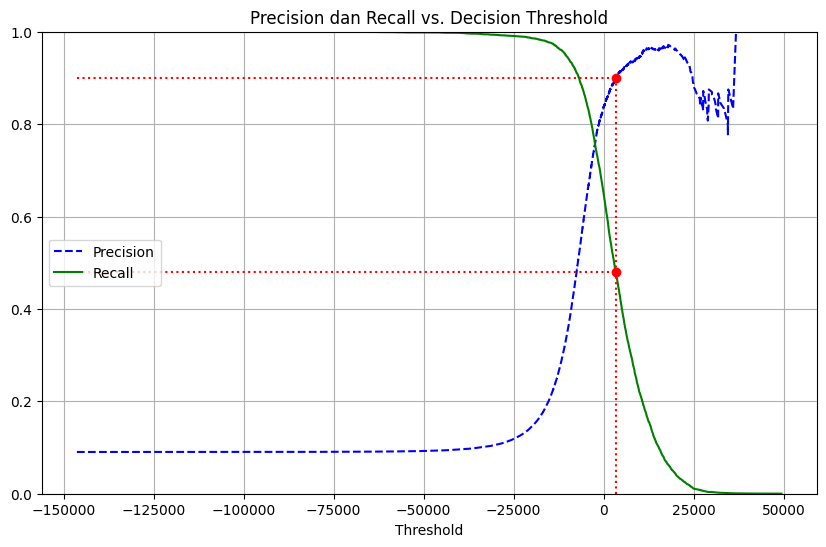

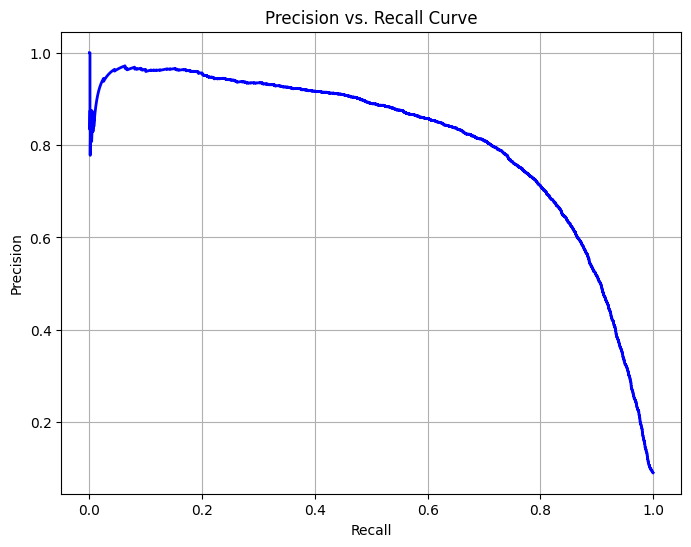


--- Kurva ROC (Receiver Operating Characteristic) SGDClassifier: ---


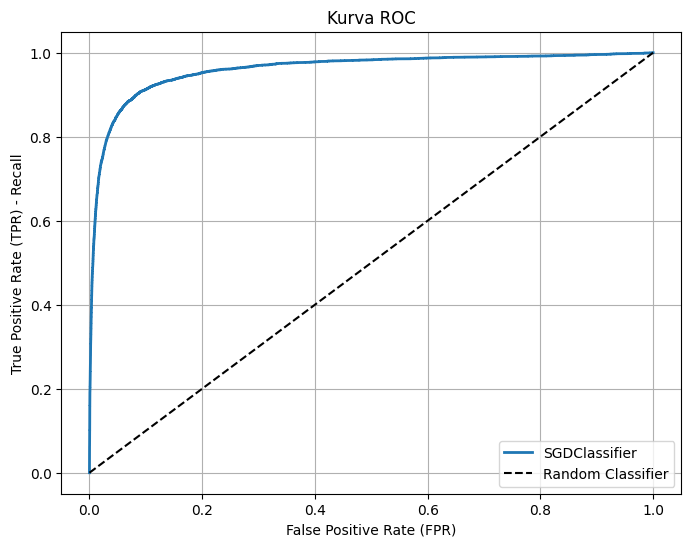

ROC AUC SGDClassifier: 0.9605

--- Membandingkan dengan RandomForestClassifier: ---


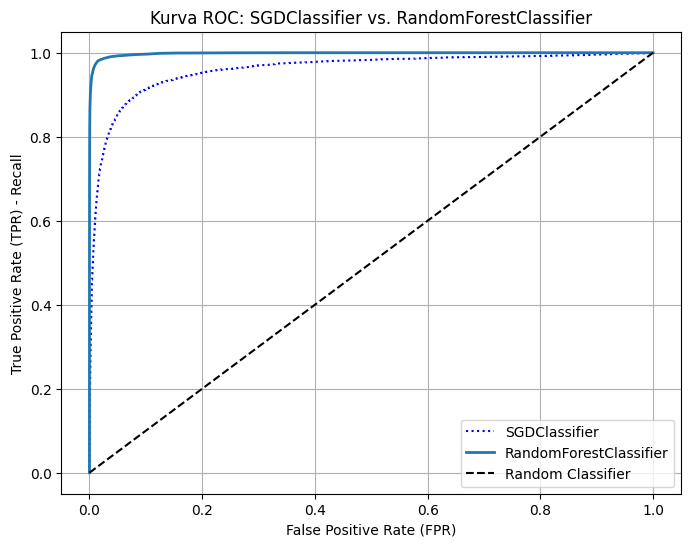

ROC AUC RandomForestClassifier: 0.9983
RandomForestClassifier menunjukkan kinerja yang jauh lebih baik.

--- Multiclass Classification (SVC dan SGDClassifier): ---
Melatih SVC...
SVC berhasil dilatih.
Prediksi SVC untuk digit pertama: 5
Decision scores SVC: [[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
Kelas yang diprediksi (argmax): 5
Kelas yang dipelajari model: [0 1 2 3 4 5 6 7 8 9]

Melatih SGDClassifier (multiclass)...
SGDClassifier multiclass berhasil dilatih.
Prediksi SGDClassifier multiclass untuk digit pertama: 3

--- Akurasi Multiclass (Cross-Validation): ---
Scores akurasi SGDClassifier multiclass: [0.87365 0.85835 0.8689 ]
Rata-rata akurasi SGDClassifier multiclass: 0.8670

--- Akurasi Multiclass setelah Scaling Input: ---
Scores akurasi SGDClassifier multiclass (Scaled): [0.8983 0.891  0.9018]
Rata-rata akurasi SGDClassifier multiclass (Scaled): 0.8970

--- Analisis Kesalahan (Confusion Matrix V

<Figure size 1000x800 with 0 Axes>

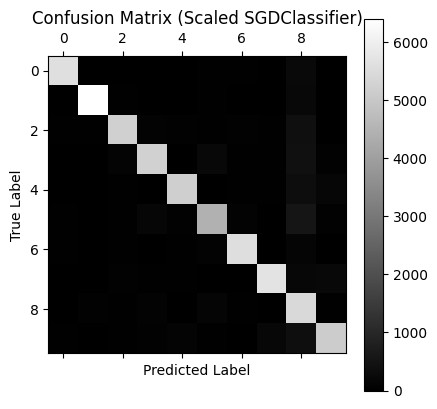

<Figure size 1000x800 with 0 Axes>

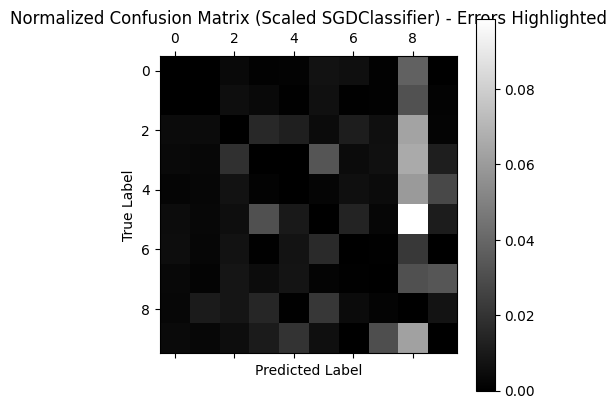

Dari matriks kesalahan, kita bisa melihat pola kesalahan. Misal, banyak digit yang salah diklasifikasikan sebagai '8'.

--- Multilabel Classification: ---
Melatih KNeighborsClassifier (multilabel)...
KNeighborsClassifier multilabel berhasil dilatih.
Prediksi Multilabel untuk digit pertama ('5'): [[False  True]]
F1 Score (macro average): 0.9764
F1 Score (weighted average): 0.9778

--- Multioutput Classification (Image Denoising): ---


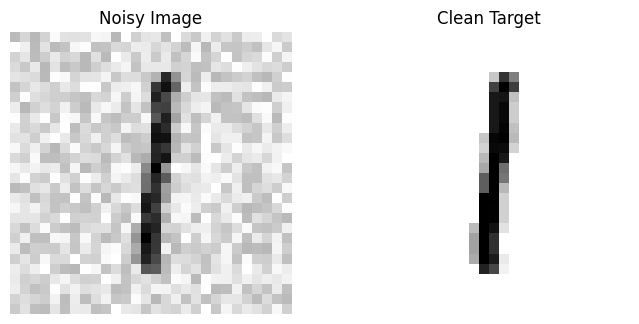

Melatih KNeighborsClassifier (denoising)...
KNeighborsClassifier denoising berhasil dilatih.


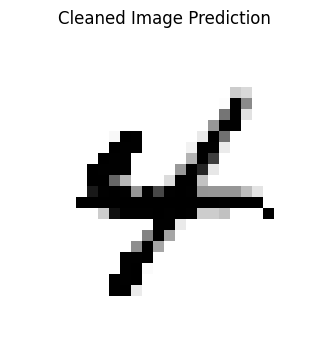


--- Selesai Reproduksi Kode Chapter 3 ---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, clone
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# --- 1. Mendapatkan Data MNIST ---
# Dataset MNIST adalah "hello world" untuk klasifikasi citra.

print("Mengunduh dataset MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
print("Dataset MNIST berhasil diunduh.")

# Pisahkan fitur (X) dan label (y)
X, y = mnist["data"], mnist["target"]

print(f"Bentuk data X: {X.shape}")
print(f"Bentuk data y: {y.shape}")

# Mengubah label y menjadi integer (seperti yang diharapkan oleh sebagian besar algoritma ML)
y = y.astype(np.uint8)

# --- 2. Membagi Data Menjadi Set Pelatihan dan Pengujian ---
# Dataset MNIST sudah terbagi: 60.000 citra untuk pelatihan, 10.000 untuk pengujian.
# Data pelatihan sudah di-shuffling.

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(f"Ukuran set pelatihan X_train: {X_train.shape}")
print(f"Ukuran set pengujian X_test: {X_test.shape}")

# --- 3. Melihat Contoh Digit ---
# Tampilkan satu contoh digit untuk visualisasi.

some_digit = X_train[0]
some_digit_image = some_digit.reshape(28, 28)

plt.figure(figsize=(4, 4))
plt.imshow(some_digit_image, cmap="binary")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

# --- 4. Pelatihan Binary Classifier (5-detector) ---
# Sederhanakan masalah: deteksi hanya digit '5'.

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print("\n--- Melatih SGDClassifier sebagai detektor '5': ---")
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
print("SGDClassifier berhasil dilatih.")

# Prediksi contoh digit
print(f"Prediksi untuk digit pertama (yang seharusnya '5'): {sgd_clf.predict([some_digit])}")

# --- 5. Metrik Kinerja Classifier ---

# a. Mengukur Akurasi Menggunakan Cross-Validation
print("\n--- Akurasi SGDClassifier (Cross-Validation): ---")
# Menggunakan StratifiedKFold secara internal untuk menjaga rasio kelas
scores_sgd = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Scores akurasi: {scores_sgd}")
print(f"Rata-rata akurasi: {scores_sgd.mean():.4f}")

# Membandingkan dengan "dumb classifier" (selalu memprediksi bukan '5')
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
scores_never_5 = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Scores akurasi (Never5Classifier): {scores_never_5}")
print(f"Rata-rata akurasi (Never5Classifier): {scores_never_5.mean():.4f}")
print("Catatan: Akurasi bukan metrik terbaik untuk dataset yang miring (skewed).")


# b. Confusion Matrix
print("\n--- Confusion Matrix SGDClassifier: ---")
# Dapatkan prediksi "bersih" pada set pelatihan menggunakan cross_val_predict
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
conf_matrix_sgd = confusion_matrix(y_train_5, y_train_pred_sgd)
print(conf_matrix_sgd)
print("Baris: kelas aktual (True Neg, True Pos); Kolom: kelas prediksi (Pred Neg, Pred Pos)")


# c. Precision dan Recall
print("\n--- Precision dan Recall SGDClassifier: ---")
precision = precision_score(y_train_5, y_train_pred_sgd)
recall = recall_score(y_train_5, y_train_pred_sgd)
f1 = f1_score(y_train_5, y_train_pred_sgd)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# d. Precision/Recall Trade-off (Kurva PR)
print("\n--- Precision/Recall Trade-off (Kurva PR): ---")
y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores_sgd)

# Fungsi untuk memplot kurva PR
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.grid(True)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# Contoh: threshold untuk 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
plt.plot([threshold_90_precision, threshold_90_precision], [0, 0.9], "r:")
plt.plot([y_scores_sgd.min(), threshold_90_precision], [0.9, 0.9], "r:")
plt.plot([y_scores_sgd.min(), threshold_90_precision], [recalls[np.argmax(precisions >= 0.90)], recalls[np.argmax(precisions >= 0.90)]], "r:")
plt.plot(threshold_90_precision, 0.9, "ro")
plt.plot(threshold_90_precision, recalls[np.argmax(precisions >= 0.90)], "ro")
plt.title("Precision dan Recall vs. Decision Threshold")
plt.show()

# Plot Precision vs Recall secara langsung
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.title("Precision vs. Recall Curve")
plt.show()


# e. The ROC Curve (Receiver Operating Characteristic)
print("\n--- Kurva ROC (Receiver Operating Characteristic) SGDClassifier: ---")
fpr_sgd, tpr_sgd, thresholds_roc_sgd = roc_curve(y_train_5, y_scores_sgd)

# Fungsi untuk memplot kurva ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Garis diagonal random
    plt.grid(True)
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR) - Recall')
    plt.title('Kurva ROC')

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd, "SGDClassifier")
plt.legend(loc="lower right")
plt.show()

# Area Under the Curve (AUC)
roc_auc_sgd = roc_auc_score(y_train_5, y_scores_sgd)
print(f"ROC AUC SGDClassifier: {roc_auc_sgd:.4f}")

# --- 6. Membandingkan Classifier (RandomForestClassifier) ---
# Bandingkan kurva ROC dan ROC AUC dengan Random Forest.

print("\n--- Membandingkan dengan RandomForestClassifier: ---")
forest_clf = RandomForestClassifier(random_state=42)
# RandomForestClassifier memiliki predict_proba(), bukan decision_function()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1] # Score adalah probabilitas kelas positif

fpr_forest, tpr_forest, thresholds_roc_forest = roc_curve(y_train_5, y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, "b:", label="SGDClassifier")
plot_roc_curve(fpr_forest, tpr_forest, "RandomForestClassifier")
plt.legend(loc="lower right")
plt.title("Kurva ROC: SGDClassifier vs. RandomForestClassifier")
plt.show()

roc_auc_forest = roc_auc_score(y_train_5, y_scores_forest)
print(f"ROC AUC RandomForestClassifier: {roc_auc_forest:.4f}")
print("RandomForestClassifier menunjukkan kinerja yang jauh lebih baik.")

# --- 7. Multiclass Classification ---
# Membedakan lebih dari dua kelas (digit 0-9).

print("\n--- Multiclass Classification (SVC dan SGDClassifier): ---")
# a. Menggunakan SVC (One-vs-One secara default untuk multiclass)
svm_clf = SVC(random_state=42)
print("Melatih SVC...")
svm_clf.fit(X_train, y_train) # Menggunakan y_train asli (0-9)
print("SVC berhasil dilatih.")

some_digit_pred_svm = svm_clf.predict([some_digit])
print(f"Prediksi SVC untuk digit pertama: {some_digit_pred_svm[0]}")

# Melihat decision scores (satu per kelas)
some_digit_scores_svm = svm_clf.decision_function([some_digit])
print(f"Decision scores SVC: {some_digit_scores_svm}")
print(f"Kelas yang diprediksi (argmax): {np.argmax(some_digit_scores_svm)}")
print(f"Kelas yang dipelajari model: {svm_clf.classes_}")

# b. Menggunakan SGDClassifier (mampu menangani multiclass secara native)
print("\nMelatih SGDClassifier (multiclass)...")
sgd_clf_multiclass = SGDClassifier(random_state=42)
sgd_clf_multiclass.fit(X_train, y_train)
print("SGDClassifier multiclass berhasil dilatih.")

some_digit_pred_sgd_mc = sgd_clf_multiclass.predict([some_digit])
print(f"Prediksi SGDClassifier multiclass untuk digit pertama: {some_digit_pred_sgd_mc[0]}")

# Evaluasi Akurasi Multiclass dengan Cross-Validation
print("\n--- Akurasi Multiclass (Cross-Validation): ---")
scores_sgd_mc = cross_val_score(sgd_clf_multiclass, X_train, y_train, cv=3, scoring="accuracy")
print(f"Scores akurasi SGDClassifier multiclass: {scores_sgd_mc}")
print(f"Rata-rata akurasi SGDClassifier multiclass: {scores_sgd_mc.mean():.4f}")

# Scaling input untuk meningkatkan kinerja SGDClassifier multiclass
print("\n--- Akurasi Multiclass setelah Scaling Input: ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64)) # Penting untuk scaling
scores_sgd_mc_scaled = cross_val_score(sgd_clf_multiclass, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(f"Scores akurasi SGDClassifier multiclass (Scaled): {scores_sgd_mc_scaled}")
print(f"Rata-rata akurasi SGDClassifier multiclass (Scaled): {scores_sgd_mc_scaled.mean():.4f}")


# --- 8. Analisis Kesalahan (Error Analysis) ---
print("\n--- Analisis Kesalahan (Confusion Matrix Visualisasi): ---")
y_train_pred_mc_scaled = cross_val_predict(sgd_clf_multiclass, X_train_scaled, y_train, cv=3)
conf_mx_scaled = confusion_matrix(y_train, y_train_pred_mc_scaled)

plt.figure(figsize=(10, 8))
plt.matshow(conf_mx_scaled, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Confusion Matrix (Scaled SGDClassifier)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualisasi matriks kesalahan yang dinormalisasi (fokus pada kesalahan)
row_sums = conf_mx_scaled.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx_scaled / row_sums
np.fill_diagonal(norm_conf_mx, 0) # Isi diagonal dengan nol untuk menyoroti kesalahan

plt.figure(figsize=(10, 8))
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Normalized Confusion Matrix (Scaled SGDClassifier) - Errors Highlighted")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Dari matriks kesalahan, kita bisa melihat pola kesalahan. Misal, banyak digit yang salah diklasifikasikan sebagai '8'.")


# --- 9. Multilabel Classification ---
# Setiap instance dapat memiliki banyak label.
# Contoh: Digit besar (>=7) DAN ganjil.

print("\n--- Multilabel Classification: ---")
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf_multilabel = KNeighborsClassifier(n_jobs=-1) # Gunakan semua core CPU
print("Melatih KNeighborsClassifier (multilabel)...")
knn_clf_multilabel.fit(X_train, y_multilabel)
print("KNeighborsClassifier multilabel berhasil dilatih.")

# Prediksi untuk digit pertama (seharusnya 5: False, True)
some_digit_multilabel_pred = knn_clf_multilabel.predict([some_digit])
print(f"Prediksi Multilabel untuk digit pertama ('5'): {some_digit_multilabel_pred}")

# Evaluasi multilabel classifier (rata-rata F1 Score)
y_train_knn_pred = cross_val_predict(knn_clf_multilabel, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_multilabel_macro = f1_score(y_multilabel, y_train_knn_pred, average="macro")
f1_multilabel_weighted = f1_score(y_multilabel, y_train_knn_pred, average="weighted")
print(f"F1 Score (macro average): {f1_multilabel_macro:.4f}")
print(f"F1 Score (weighted average): {f1_multilabel_weighted:.4f}")


# --- 10. Multioutput Classification ---
# Generalisasi multilabel classification, di mana setiap label bisa berupa multiclass.
# Contoh: Denoising citra.

print("\n--- Multioutput Classification (Image Denoising): ---")
# Membuat data yang berisik (noisy)
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_noisy = X_train + noise
X_test_noisy = X_test + np.random.randint(0, 100, (len(X_test), 784))
y_train_denoised = X_train
y_test_denoised = X_test

# Tampilkan citra berisik dan citra bersih (target)
some_index_denoised = 5500 # Pilih indeks yang berbeda untuk contoh ini

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(X_train_noisy[some_index_denoised].reshape(28, 28), cmap="binary")
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(122)
plt.imshow(y_train_denoised[some_index_denoised].reshape(28, 28), cmap="binary")
plt.title("Clean Target")
plt.axis("off")
plt.show()

# Melatih KNeighborsClassifier untuk denoising
# Model ini akan memprediksi intensitas piksel (multioutput dan multiclass per piksel)
print("Melatih KNeighborsClassifier (denoising)...")
knn_clf_denoising = KNeighborsClassifier(n_jobs=-1)
knn_clf_denoising.fit(X_train_noisy, y_train_denoised)
print("KNeighborsClassifier denoising berhasil dilatih.")

# Prediksi dan tampilkan citra yang telah di-denoise
some_digit_denoised = X_test_noisy[some_index_denoised]
cleaned_digit = knn_clf_denoising.predict([some_digit_denoised])

plt.figure(figsize=(4, 4))
plt.imshow(cleaned_digit.reshape(28, 28), cmap="binary")
plt.title("Cleaned Image Prediction")
plt.axis("off")
plt.show()

print("\n--- Selesai Reproduksi Kode Chapter 3 ---")

